# 1. Importing Libraries

In [3]:
#!/usr/bin/env python3
#-*- coding:utf-8 -*-

#for array calcutions
import numpy as np
#for web framwork 
from flask import Flask, request, jsonify, render_template, send_from_directory
#for serialising and loading the model
import pickle 
#for convering corpus into frequency matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 
#split the data
from sklearn.model_selection import train_test_split
#for perfomance measure
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

# 2. Data Extraction and Processing

- Task 1: Load a raw Fastq file, and generate a processed file and split that file into k-mers.
- Task 2: Percy applies bio-processing techniques on the dataset.

# 3. Biological Data - Example

In [4]:
#define the synthetic data with labels  

sequences = [
    "atg cgt tac caa gtc agg tct gtg aac tag",
    "ggc ttt agg cca act gtc tac gat cac acg",
    "ttc agg tag tct atc gcg gta gac tgt tac",
    "act gga tga cta tcg cgt aca tca gta gag",
    "tta gct atc agt agc ttg tgt tct cca atc",
    "gtc cga gac tgc ctc aag ctt gat tac atg",
    "cat gct aac tac gta cga tgc ctc acg tgg",
    "tac gat cgt acg tgc cta act gga tct atg",
    "gga tct gct tct cga tgt tac atg gca cgt",
    "ttg cgt tac aca gga cgt ttc tct atg gct",
    "cga tct gct tac gct tac aca gga tgc tct",
    "tac gga cgt ttc tct atg gct cga tct gct",
    "tac gct tac aca gga tgc tct tac gga cgt",
    "ttc tct atg gct cga tct gct tac gct tac",
    "aca gga tgc tct tac gga cgt ttc tct atg",
]

labels = [2, 1, 4, 0, 3, 1, 2, 4, 0, 3, 1, 2, 4, 0, 3]


In [5]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(sequences, labels,
                                                    test_size = 0.5,
                                                    stratify= labels)

In [6]:
X_train

['tac gat cgt acg tgc cta act gga tct atg',
 'ttc agg tag tct atc gcg gta gac tgt tac',
 'ttc tct atg gct cga tct gct tac gct tac',
 'ggc ttt agg cca act gtc tac gat cac acg',
 'tta gct atc agt agc ttg tgt tct cca atc',
 'atg cgt tac caa gtc agg tct gtg aac tag',
 'act gga tga cta tcg cgt aca tca gta gag']

#### Transform training data and train model 

In [5]:
#create a frequency matrix to vectorise the sequences 
vectorizer = TfidfVectorizer(analyzer='word', tokenizer = lambda x: x.split())

In [6]:
#tokenize the words and create frequency matrix 
vectorizer.fit(X_train)

c:\Users\mpumi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function <lambda> at 0x0000020C63532700>)

In [7]:
#summary 
print("Vocabulary: {}".format(vectorizer.vocabulary_))
print("Our vocabulary has {} tokens.".format(len(vectorizer.vocabulary_)))

Vocabulary: {'tac': 20, 'gct': 15, 'aca': 1, 'gga': 16, 'tgc': 23, 'tct': 22, 'cgt': 13, 'tta': 25, 'atc': 7, 'agt': 6, 'agc': 4, 'ttg': 27, 'tgt': 24, 'cca': 11, 'cga': 12, 'ttc': 26, 'atg': 8, 'caa': 9, 'gtc': 18, 'agg': 5, 'gtg': 19, 'aac': 0, 'tag': 21, 'ggc': 17, 'ttt': 28, 'act': 3, 'gat': 14, 'cac': 10, 'acg': 2}
Our vocabulary has 29 tokens.


In [8]:
#extract frequency matrix 
X_ = vectorizer.transform(X_train)

In [9]:
X_

<7x29 sparse matrix of type '<class 'numpy.float64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [10]:
#load model 
with open('lr_tf_idf_multiclass_SMOTE.sav','rb') as f: 
    model_sav = pickle.load(f)

c:\Users\mpumi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
#inference 
# y_pred = model_sav.predict(X)

**Comment**: The trained model requires 8,386 features which should be obtained from the Fastq data, which was not present as the time of the writing of this code. 

Instead, we will use a vanilla Multinomial Naive Bayes model as a test case.

In [12]:
#using Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [13]:
model_nb = MultinomialNB()

In [14]:
#train the model 
model_nb.fit(X_, y_train)

MultinomialNB()

In [15]:
#transform X_test
X_t = vectorizer.transform(X_test)

In [16]:
y_pred = model_nb.predict(X_t)

# 4. Create a Confusion Matrix

In [20]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize = 'true')

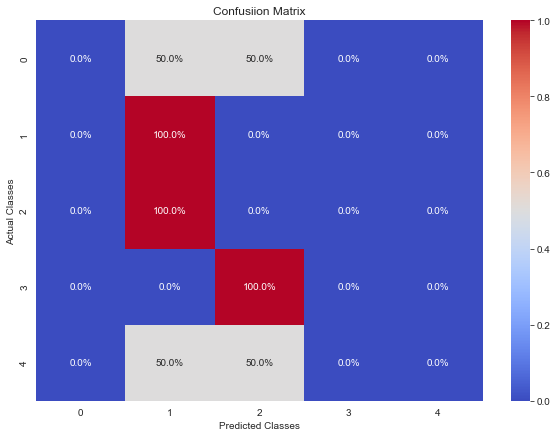

In [23]:
#create confusion matrix via seaborn 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt = '.1%', cmap = 'coolwarm')

plt.title('Confusiion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.savefig('confusion_matrix.png')
plt.show()
